## Loading The Data

In [1]:
import pyspark
from pyspark.sql import SparkSession, SQLContext
from pyspark import SparkConf, SparkContext

In [3]:
spark=SparkSession.builder.master("local[2]").appName("Credit-Card-Fraud-Detection").getOrCreate()
# Creating the spark session

In [4]:
spark

In [5]:
sc=spark.sparkContext
sc

<SparkContext master=local[*] appName=PySparkShell>

In [6]:
sqlContext=SQLContext(spark.sparkContext)
sqlContext
#A SQLContext can be used create`DataFrame`, register `DataFrame` as 
# tables, execute SQL over tables, cache tables, and read parquet files.

In [7]:
data=spark.read.csv("C:\\Users\\Majid\\Desktop\\Jupeyetr\\Github\\Credit Card Fraud Detection\\creditcard.csv",\
                    header = 'True',inferSchema='True')
# Loads the csv file and return the result as a`DataFrame`.

In [9]:
data.cache()
data.is_cached

True

## Exploratory Data Analysis

In [9]:
data.show(n=5, vertical=True)
# only showing top 5 row

-RECORD 0----------------------
 Time   | 0                    
 V1     | -1.3598071336738     
 V2     | -0.0727811733098497  
 V3     | 2.53634673796914     
 V4     | 1.37815522427443     
 V5     | -0.338320769942518   
 V6     | 0.462387777762292    
 V7     | 0.239598554061257    
 V8     | 0.0986979012610507   
 V9     | 0.363786969611213    
 V10    | 0.0907941719789316   
 V11    | -0.551599533260813   
 V12    | -0.617800855762348   
 V13    | -0.991389847235408   
 V14    | -0.311169353699879   
 V15    | 1.46817697209427     
 V16    | -0.470400525259478   
 V17    | 0.207971241929242    
 V18    | 0.0257905801985591   
 V19    | 0.403992960255733    
 V20    | 0.251412098239705    
 V21    | -0.018306777944153   
 V22    | 0.277837575558899    
 V23    | -0.110473910188767   
 V24    | 0.0669280749146731   
 V25    | 0.128539358273528    
 V26    | -0.189114843888824   
 V27    | 0.133558376740387    
 V28    | -0.0210530534538215  
 Amount | 149.62               
 Class  

In [10]:
data.count()
#the number of rows in this`DataFrame`

284807

In [11]:
data.printSchema()
# Print out the schema

root
 |-- Time: decimal(10,0) (nullable = true)
 |-- V1: double (nullable = true)
 |-- V2: double (nullable = true)
 |-- V3: double (nullable = true)
 |-- V4: double (nullable = true)
 |-- V5: double (nullable = true)
 |-- V6: double (nullable = true)
 |-- V7: double (nullable = true)
 |-- V8: double (nullable = true)
 |-- V9: double (nullable = true)
 |-- V10: double (nullable = true)
 |-- V11: double (nullable = true)
 |-- V12: double (nullable = true)
 |-- V13: double (nullable = true)
 |-- V14: double (nullable = true)
 |-- V15: double (nullable = true)
 |-- V16: double (nullable = true)
 |-- V17: double (nullable = true)
 |-- V18: double (nullable = true)
 |-- V19: double (nullable = true)
 |-- V20: double (nullable = true)
 |-- V21: double (nullable = true)
 |-- V22: double (nullable = true)
 |-- V23: double (nullable = true)
 |-- V24: double (nullable = true)
 |-- V25: double (nullable = true)
 |-- V26: double (nullable = true)
 |-- V27: double (nullable = true)
 |-- V28: double

In [13]:
data.columns
# all column names

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [21]:
data.describe().show()
# Compute basic statistics for numeric and string columns

+-------+------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------------+--------------------+
|summary|              Time|                  V1|                  V2|                  V3|                  V4|                  V5|                  V6|                  V7|                  V8|                  V9|                 V10|                 V11|                 V12|                 V13|                 V14|                 V15|

In [14]:
data.describe(["V1", "V2", "V3", "V4", "Time"]).show()

+-------+--------------------+--------------------+--------------------+--------------------+------------------+
|summary|                  V1|                  V2|                  V3|                  V4|              Time|
+-------+--------------------+--------------------+--------------------+--------------------+------------------+
|  count|              284807|              284807|              284807|              284807|            284807|
|   mean|9.516248586879277...|-4.15138361172585...|-1.31566926771619...|1.497691472230329...|        94813.8596|
| stddev|  1.9586958038574889|  1.6513085794769968|  1.5162550051777701|  1.4158685749409217|47488.145954566266|
|    min|    -56.407509631329|   -72.7157275629303|   -48.3255893623954|   -5.68317119816995|                 0|
|    max|    2.45492999121121|    22.0577289904909|    9.38255843282114|    16.8753440335975|            172792|
+-------+--------------------+--------------------+--------------------+--------------------+---

In [15]:
print("No Frauds", (data[data["Class"]==0].count()/(data.count()))*100, "percent of the dataset") 
print("Frauds", (data[data["Class"]==1].count()/(data.count()))*100, "percent of the dataset") 

# checking if we have an imbalanced data set

No Frauds 99.82725143693798 percent of the dataset
Frauds 0.1727485630620034 percent of the dataset


In [28]:
import seaborn as sns

In [29]:
data.select("Class").toPandas().shape

(284807, 1)

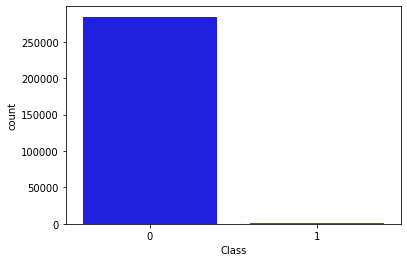

In [30]:
sns.countplot(data.select("Class").toPandas()["Class"], palette=["b", "r"])

Notice how imbalanced is our dataset!

Distributions: By seeing the distributions we can have an idea how skewed are these features.

In [31]:
import matplotlib.pyplot as plt
import numpy as np

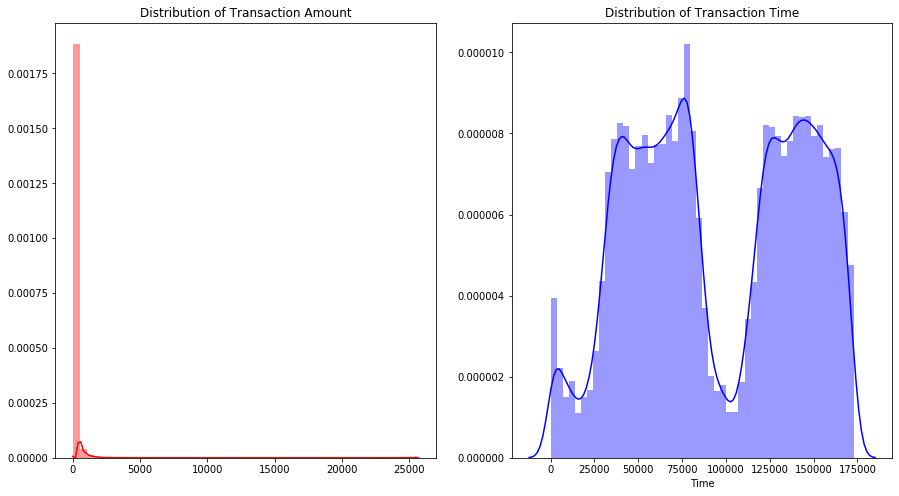

In [32]:
fig,ax=plt.subplots(1,2, figsize=(15,8))
amount=np.array(data.select("Amount").toPandas()["Amount"], dtype="float64")
time=data.select("Time").toPandas()["Time"].astype("float64")

sns.distplot(amount, ax=ax[0], color="r")
ax[0].set_title("Distribution of Transaction Amount")

sns.distplot(time, ax=ax[1], color="b")
ax[1].set_title("Distribution of Transaction Time")
plt.show()

Let's try to make a balanced dataset.

In [33]:
data.where(data["Class"]==0).count()

284315

In [37]:
Class1=data[data["Class"]==1]

In [38]:
Class1.count()

492

In [39]:
Class0=data.where(data["Class"]==0)

In [40]:
Class0.count()

284315

In [41]:
Class_0=Class0.sample(fraction=(488)/284315,seed=11)

In [42]:
Class_0.count()

493

In [43]:
df=Class_0.unionByName(Class1)

In [44]:
df.count()

985

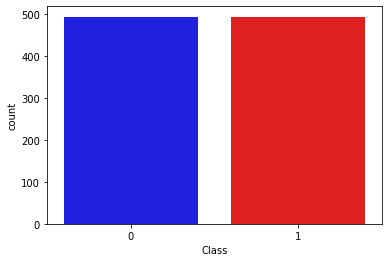

In [45]:
sns.countplot(df.select("Class").toPandas()["Class"], palette=["b", "r"])

#Distribution of the Classes in the subsample dataset

### Detecting outliers and checking the correlation.

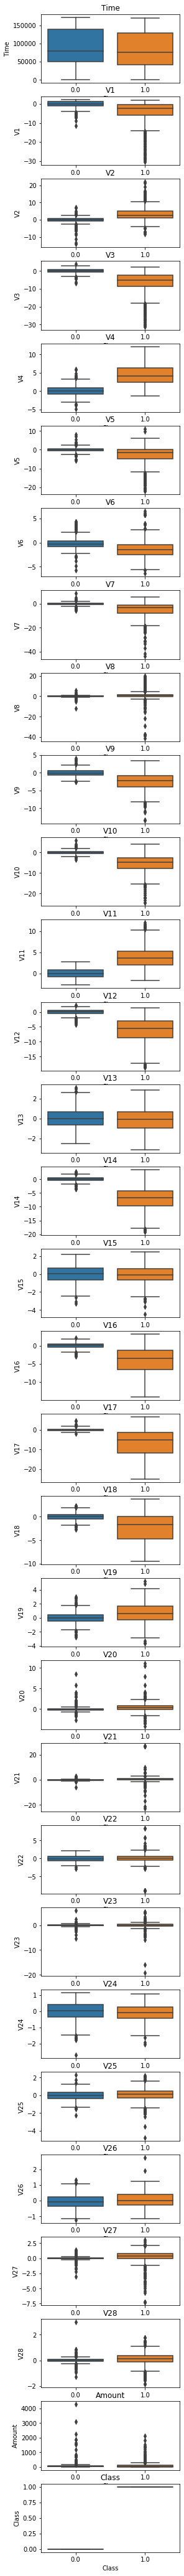

In [46]:
fig,ax=plt.subplots(len(df.columns), figsize=(4,75))

for i, c in enumerate(df.columns):
    sns.boxplot(x=df.select("Class").toPandas()["Class"].astype("float64"),\
     y=df.select(c).toPandas()[c].astype("float64"), ax=ax[i])
    ax[i].set_title(c)

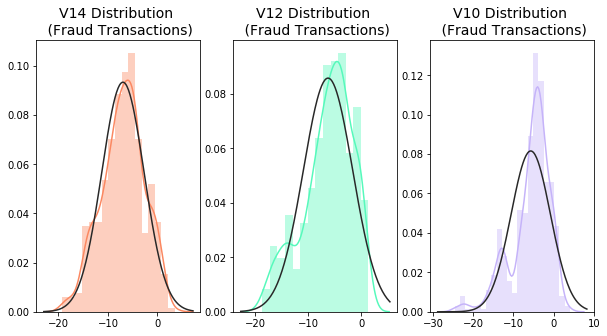

In [47]:
from scipy.stats import norm
fig, (ax1, ax2, ax3)=plt.subplots(1,3, figsize=(10,5))

v14_fraud_dist_df=df.select("V14", "Class").toPandas().astype("float64")
v14_fraud_dist=v14_fraud_dist_df["V14"].loc[v14_fraud_dist_df['Class'] == 1].values
sns.distplot(v14_fraud_dist, fit=norm, ax=ax1,color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)



v12_fraud_dist_df=df.select("V12", "Class").toPandas().astype("float64")
v12_fraud_dist=v12_fraud_dist_df["V12"].loc[v12_fraud_dist_df['Class'] == 1].values
sns.distplot(v12_fraud_dist, fit=norm, ax=ax2, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)



v10_fraud_dist_df=df.select("V10", "Class").toPandas().astype("float64")
v10_fraud_dist=v10_fraud_dist_df["V10"].loc[v10_fraud_dist_df['Class'] == 1].values
sns.distplot(v10_fraud_dist, fit=norm, ax=ax3 , color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

#### Outliers

In [53]:
import pandas as pd

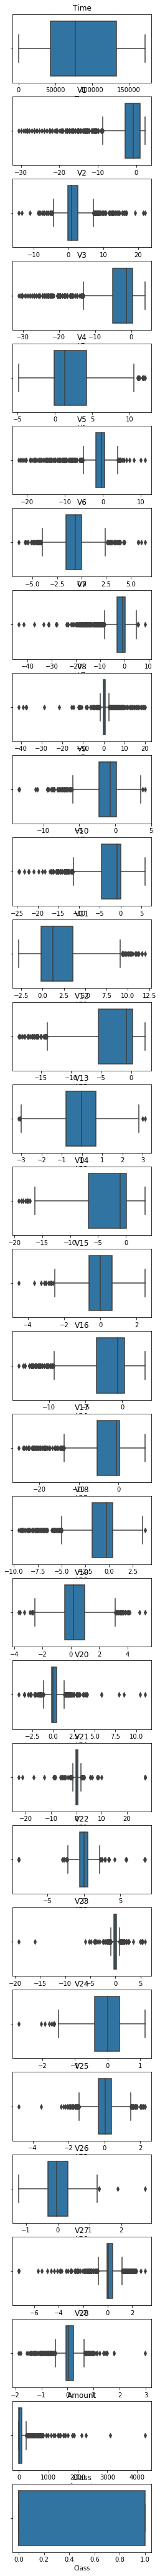

In [54]:
fig,ax=plt.subplots(len(df.columns), figsize=(4,75))
for i, c in enumerate(df.columns):
    sns.boxplot(df.select(c).toPandas()[c].astype("float64"), ax=ax[i])
    ax[i].set_title(c)

In [48]:
d={} 
#quartile 25th and 75th percentiles

IQR={}
#interquartile range (IQR)

b={}
#bounds

for col in df.columns:
    d[col]=df.approxQuantile(col, [0.25,0.75], 0.05)
    IQR[col]=d[col][1]-d[col][0]
    b[col]=(d[col][0]-(1.5*IQR[col]), d[col][1]+(1.5*IQR[col]))
    

In [50]:
Quantiles=pd.DataFrame(d, index=["25_Quantile", "75Quantile"])
IQRs=pd.DataFrame(IQR, index=["IQR"])
bounds=pd.DataFrame(b, index=["lower_bound", "uper_bound"])

In [51]:
Quantiles_IQRs_bounds=pd.concat([Quantiles,IQRs, bounds])

In [52]:
Quantiles_IQRs_bounds

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
25_Quantile,41170.0,-3.308576,-0.223057,-5.660999,-0.267565,-2.148047,-1.827565,-3.513687,-0.245863,-2.516752,...,-0.221113,-0.599350,-0.246713,-0.425550,-0.370594,-0.335810,-0.065143,-0.065078,1.00,0.0
75Quantile,129308.0,0.754316,2.773082,0.181693,4.262003,0.278394,-0.098621,0.185599,0.699136,0.010322,...,0.610654,0.473262,0.141723,0.306845,0.353841,0.243696,0.418012,0.172521,76.94,1.0
IQR,88138.0,4.062892,2.996138,5.842693,4.529569,2.426441,1.728944,3.699286,0.944999,2.527074,...,0.831767,1.072612,0.388436,0.732396,0.724434,0.579506,0.483156,0.237599,75.94,1.0
lower_bound,-91037.0,-9.402914,-4.717265,-14.425038,-7.061918,-5.787708,-4.420981,-9.062615,-1.663362,-6.307363,...,-1.468762,-2.208268,-0.829367,-1.524144,-1.457245,-1.205070,-0.789877,-0.421476,-112.91,-1.5
uper_bound,261515.0,6.848654,7.267289,8.945733,11.056356,3.918055,2.494795,5.734527,2.116635,3.800932,...,1.858304,2.082179,0.724377,1.405439,1.440492,1.112955,1.142746,0.528919,190.85,2.5


In [56]:
import pyspark.sql.functions as F

In [57]:
for col in df.columns:
    df= df.withColumn(col,F.when(df[col] < b[col][0],b[col][0]).when(df[col] > b[col][1], b[col][1]).otherwise(df[col]))
# replace the outliers by suitable values

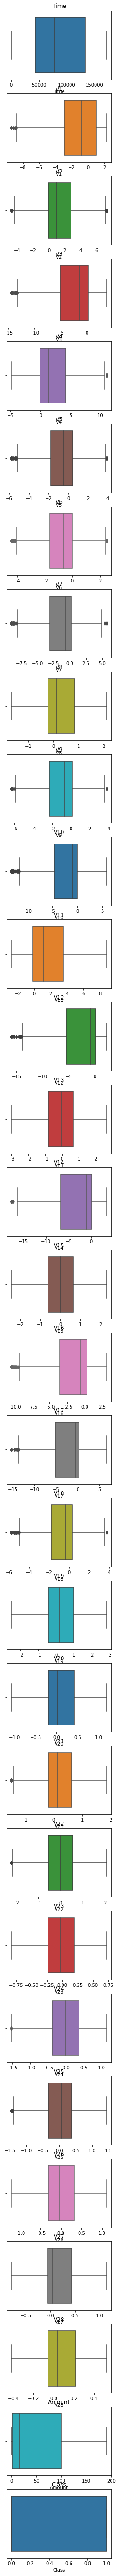

In [114]:
fig,ax=plt.subplots(len(df.columns), figsize=(4,100))
colors=["C{0}".format(i) for i in range(len(df.columns))]
for i, c in enumerate(df.columns):
    sns.boxplot(df.select(c).toPandas()[c].astype("float64"), ax=ax[i], color=colors[i])
    ax[i].set_title(c)

Much better!

#### Correlations

In [60]:
corr=[df.corr("Class", c) for c in df.columns]

In [61]:
Corr=pd.DataFrame(corr, columns=["Corr_with_Target"], index=[c for c in df.columns]).sort_values("Corr_with_Target", ascending=False)

In [62]:
Corr

,Corr_with_Target
Class,1.000000
V4,0.712793
V11,0.693034
V2,0.560607
V21,0.385905
V27,0.308193
V8,0.270941
V19,0.259911
V20,0.248293
V28,0.190029


## Model Prediction

#### Preprocessing

In [63]:
from pyspark.ml.feature import VectorAssembler, StandardScaler, MinMaxScaler
from pyspark.ml import Pipeline

In [64]:
A1=['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12',
'V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount']

In [65]:
assembler1=VectorAssembler(inputCols=A1, outputCol="assembledFeatures")

In [66]:
df_assembled=assembler1.transform(df)

In [67]:
df_assembled.collect()[1][:]

(1313.0,
 -0.602956302517456,
 1.13415611730929,
 2.5138209548054,
 3.1061854269537,
 -0.358771841863106,
 0.582460370928395,
 0.0179409649270832,
 0.13851036032553,
 -0.833145740580381,
 0.685054565473114,
 -0.133965967412166,
 0.501086383898536,
 0.940556214169778,
 -0.514888873445392,
 0.389683244508012,
 -0.814796431437808,
 0.665710255238125,
 -0.519633815758192,
 0.36384134078239,
 0.0771286498971333,
 0.288975379698096,
 1.05087316429258,
 -0.113606138846505,
 0.67286375991341,
 -0.487204221070292,
 0.296832035215089,
 -0.0522288072079208,
 0.176775974263661,
 11.37,
 0.0,
 DenseVector([1313.0, -0.603, 1.1342, 2.5138, 3.1062, -0.3588, 0.5825, 0.0179, 0.1385, -0.8331, 0.6851, -0.134, 0.5011, 0.9406, -0.5149, 0.3897, -0.8148, 0.6657, -0.5196, 0.3638, 0.0771, 0.289, 1.0509, -0.1136, 0.6729, -0.4872, 0.2968, -0.0522, 0.1768, 11.37]))

In [68]:
scaler = MinMaxScaler(inputCol="assembledFeatures", outputCol="scaledFeatures")

# Compute summary statistics and generate MinMaxScalerModel
scalerModel = scaler.fit(df_assembled)

# rescale each feature to range [min, max].
scaledData = scalerModel.transform(df_assembled)

In [70]:
(trainingData, testData) = scaledData.randomSplit([0.7, 0.3],seed = 11)

#### Random Forest

In [78]:
from pyspark.ml.classification import RandomForestClassifier

In [79]:
Ra=RandomForestClassifier(featuresCol="scaledFeatures", labelCol="Class", predictionCol='prediction')

In [80]:
Model_Ra=Ra.fit(trainingData)

In [89]:
Model_Ra_Prediction=Model_Ra.transform(testData)

In [91]:
Model_Ra_Prediction.select("prediction", "Class", "scaledFeatures").show()

+----------+-----+--------------------+
|prediction|Class|      scaledFeatures|
+----------+-----+--------------------+
|       0.0|  0.0|[0.01409944184854...|
|       0.0|  0.0|[0.01414022535802...|
|       0.0|  0.0|[0.02732495135109...|
|       0.0|  0.0|[0.02943404141274...|
|       0.0|  0.0|[0.04258963632761...|
|       0.0|  0.0|[0.04659224647222...|
|       0.0|  0.0|[0.04986075344620...|
|       0.0|  0.0|[0.06169379741082...|
|       0.0|  0.0|[0.07832181684708...|
|       0.0|  0.0|[0.14760134702105...|
|       0.0|  0.0|[0.14959391276989...|
|       0.0|  0.0|[0.15470933010172...|
|       0.0|  0.0|[0.15775644088138...|
|       0.0|  0.0|[0.16619862734359...|
|       0.0|  0.0|[0.16877964087206...|
|       0.0|  0.0|[0.17208310513988...|
|       0.0|  0.0|[0.19237581421363...|
|       0.0|  0.0|[0.19719409454782...|
|       0.0|  0.0|[0.19841177361656...|
|       0.0|  0.0|[0.20346310257635...|
+----------+-----+--------------------+
only showing top 20 rows



In [101]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [109]:
Model_Ra_accuracy = evaluator.evaluate(Model_Ra_Prediction)
print("Accuracy of Random Forest is = %g"% (Model_Ra_accuracy))
print("Test Error of Random Forest = %g " % (1.0 - Model_Ra_accuracy))

Accuracy of Random Forest is = 0.940741
Test Error of Random Forest = 0.0592593 


## Naive Bayes

In [83]:
from pyspark.ml.classification import NaiveBayes

In [84]:
Nb=NaiveBayes(featuresCol="scaledFeatures", labelCol="Class", predictionCol='prediction')

In [87]:
Model_Nb=Nb.fit(trainingData)
Model_Nb_Prediction=Model_Nb.transform(testData)

In [92]:
Model_Nb_Prediction.select("prediction", "Class", "scaledFeatures").show()

+----------+-----+--------------------+
|prediction|Class|      scaledFeatures|
+----------+-----+--------------------+
|       0.0|  0.0|[0.01409944184854...|
|       0.0|  0.0|[0.01414022535802...|
|       0.0|  0.0|[0.02732495135109...|
|       0.0|  0.0|[0.02943404141274...|
|       0.0|  0.0|[0.04258963632761...|
|       0.0|  0.0|[0.04659224647222...|
|       0.0|  0.0|[0.04986075344620...|
|       0.0|  0.0|[0.06169379741082...|
|       0.0|  0.0|[0.07832181684708...|
|       0.0|  0.0|[0.14760134702105...|
|       0.0|  0.0|[0.14959391276989...|
|       0.0|  0.0|[0.15470933010172...|
|       0.0|  0.0|[0.15775644088138...|
|       0.0|  0.0|[0.16619862734359...|
|       0.0|  0.0|[0.16877964087206...|
|       0.0|  0.0|[0.17208310513988...|
|       0.0|  0.0|[0.19237581421363...|
|       0.0|  0.0|[0.19719409454782...|
|       0.0|  0.0|[0.19841177361656...|
|       0.0|  0.0|[0.20346310257635...|
+----------+-----+--------------------+
only showing top 20 rows



In [111]:
Model_Nb_accuracy = evaluator.evaluate(Model_Nb_Prediction)
print("Accuracy of Naive Bayes is = %g"% (Model_Nb_accuracy))
print("Test Error of Naive Bayes = %g " % (1.0 - Model_Nb_accuracy))

Accuracy of Naive Bayes is = 0.859259
Test Error of Naive Bayes = 0.140741 


#### Gradient-Boosted Trees

In [96]:
from pyspark.ml.classification import GBTClassifier

In [97]:
gb=GBTClassifier(featuresCol="scaledFeatures", labelCol="Class", predictionCol='prediction')

In [98]:
Model_gb=gb.fit(trainingData)
Model_gb_Prediction=Model_gb.transform(testData)

In [99]:
Model_gb_Prediction.select("prediction", "Class", "scaledFeatures").show()

+----------+-----+--------------------+
|prediction|Class|      scaledFeatures|
+----------+-----+--------------------+
|       0.0|  0.0|[0.01409944184854...|
|       0.0|  0.0|[0.01414022535802...|
|       0.0|  0.0|[0.02732495135109...|
|       0.0|  0.0|[0.02943404141274...|
|       1.0|  0.0|[0.04258963632761...|
|       0.0|  0.0|[0.04659224647222...|
|       0.0|  0.0|[0.04986075344620...|
|       0.0|  0.0|[0.06169379741082...|
|       0.0|  0.0|[0.07832181684708...|
|       0.0|  0.0|[0.14760134702105...|
|       0.0|  0.0|[0.14959391276989...|
|       0.0|  0.0|[0.15470933010172...|
|       0.0|  0.0|[0.15775644088138...|
|       0.0|  0.0|[0.16619862734359...|
|       0.0|  0.0|[0.16877964087206...|
|       0.0|  0.0|[0.17208310513988...|
|       0.0|  0.0|[0.19237581421363...|
|       1.0|  0.0|[0.19719409454782...|
|       0.0|  0.0|[0.19841177361656...|
|       0.0|  0.0|[0.20346310257635...|
+----------+-----+--------------------+
only showing top 20 rows



In [112]:
Model_gb_accuracy = evaluator.evaluate(Model_gb_Prediction)
print("Accuracy of Gradient-Boosted Trees is = %g"% (Model_gb_accuracy))
print("Test Error of Gradient-Boosted Trees = %g " % (1.0 - Model_gb_accuracy))

Accuracy of Gradient-Boosted Trees is = 0.918519
Test Error of Gradient-Boosted Trees = 0.0814815 


#### Logistic Regression

In [102]:
from pyspark.ml.classification import LogisticRegression

In [103]:
lr=LogisticRegression(featuresCol="scaledFeatures", labelCol="Class", predictionCol='prediction')

In [104]:
Model=lr.fit(trainingData)

In [105]:
Model_prediction=Model.transform(testData)

In [106]:
Model_prediction.select("prediction", "Class", "scaledFeatures").show()

+----------+-----+--------------------+
|prediction|Class|      scaledFeatures|
+----------+-----+--------------------+
|       0.0|  0.0|[0.01409944184854...|
|       0.0|  0.0|[0.01414022535802...|
|       0.0|  0.0|[0.02732495135109...|
|       0.0|  0.0|[0.02943404141274...|
|       0.0|  0.0|[0.04258963632761...|
|       0.0|  0.0|[0.04659224647222...|
|       0.0|  0.0|[0.04986075344620...|
|       0.0|  0.0|[0.06169379741082...|
|       0.0|  0.0|[0.07832181684708...|
|       0.0|  0.0|[0.14760134702105...|
|       0.0|  0.0|[0.14959391276989...|
|       0.0|  0.0|[0.15470933010172...|
|       0.0|  0.0|[0.15775644088138...|
|       0.0|  0.0|[0.16619862734359...|
|       0.0|  0.0|[0.16877964087206...|
|       0.0|  0.0|[0.17208310513988...|
|       0.0|  0.0|[0.19237581421363...|
|       0.0|  0.0|[0.19719409454782...|
|       0.0|  0.0|[0.19841177361656...|
|       0.0|  0.0|[0.20346310257635...|
+----------+-----+--------------------+
only showing top 20 rows



In [107]:
evaluator = MulticlassClassificationEvaluator(labelCol="Class", predictionCol="prediction", metricName="accuracy")

In [113]:
Model_accuracy = evaluator.evaluate(Model_prediction)
print("Accuracy of LogisticRegression is = %g"% (Model_accuracy))
print("Test Error of LogisticRegression = %g " % (1.0 - Model_accuracy))

Accuracy of LogisticRegression is = 0.951852
Test Error of LogisticRegression = 0.0481481 
